In [2]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cotacao_trim = pd.read_csv(r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\cotacao_trimestral.csv")



In [4]:
cotacao_trim

,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,noma_empresa_padronizado
0,2014-03-31,7526557000100.00,ABEV3,AMBEV S/A,16.95,ambevsa
1,2014-03-31,10338320000100.00,AFLT3,AFLUENTE T,3.00,afluentet
2,2014-03-31,7628528000159.00,AGRO3,BRASILAGRO,8.78,brasilagro
3,2014-03-31,61079117000105.00,ALPA3,ALPARGATAS,11.85,alpargatas
4,2014-03-31,61189288000189.00,AMAR3,LOJAS MARISA,15.40,lojasmari
...,...,...,...,...,...,...
12587,2024-01-02,8613550000198.00,NEXP3,NEXPE,5.01,nexpe
12588,2024-01-02,4032433000180.00,ATMP3,ATMASA,4.55,atma
12589,2024-01-02,7857850000150.00,GPIV33,GP INVEST,2.75,gpinvest
12590,2024-01-02,38307135000177.00,G2DI33,G2D INVEST,2.04,g2dinvest


In [5]:
cotacao_trim[(cotacao_trim['cod_negociacao'] == 'ABEV3') | (cotacao_trim['cod_negociacao'] =='AGRO3')].head(30)

,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,noma_empresa_padronizado
0,2014-03-31,7526557000100.00,ABEV3,AMBEV S/A,16.95,ambevsa
2,2014-03-31,7628528000159.00,AGRO3,BRASILAGRO,8.78,brasilagro
138,2014-06-30,7526557000100.00,ABEV3,AMBEV S/A,15.76,ambevsa
139,2014-06-30,7628528000159.00,AGRO3,BRASILAGRO,9.60,brasilagro
269,2014-09-30,7526557000100.00,ABEV3,AMBEV S/A,16.04,ambevsa
270,2014-09-30,7628528000159.00,AGRO3,BRASILAGRO,9.06,brasilagro
403,2014-12-30,7526557000100.00,ABEV3,AMBEV S/A,16.35,ambevsa
404,2014-12-30,7628528000159.00,AGRO3,BRASILAGRO,9.09,brasilagro
540,2015-03-31,7526557000100.00,ABEV3,AMBEV S/A,18.45,ambevsa
541,2015-03-31,7628528000159.00,AGRO3,BRASILAGRO,8.87,brasilagro


In [6]:
# Agrupar pelo código de negociação
cotacao_agrupado = cotacao_trim.groupby('cod_negociacao').apply(lambda x: x.sort_values('data_pregao')).reset_index(drop=True)

# Mostrar o resultado
cotacao_agrupado

C:\Users\usuario\AppData\Local\Temp\ipykernel_4512\1169394240.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cotacao_agrupado = cotacao_trim.groupby('cod_negociacao').apply(lambda x: x.sort_values('data_pregao')).reset_index(drop=True)


,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,noma_empresa_padronizado
0,2016-12-29,42771949000135.00,AALR3,ALLIAR,14.65,alliar
1,2017-03-31,42771949000135.00,AALR3,ALLIAR,15.63,alliar
2,2017-05-31,42771949000135.00,AALR3,ALLIAR,17.73,alliar
3,2017-06-30,42771949000135.00,AALR3,ALLIAR,17.54,alliar
4,2017-08-31,42771949000135.00,AALR3,ALLIAR,16.40,alliar
...,...,...,...,...,...,...
12587,2023-06-30,13574594000196.00,ZAMP3,ZAMP S.A.,4.55,zamp
12588,2023-08-31,13574594000196.00,ZAMP3,ZAMP S.A.,5.55,zamp
12589,2023-09-29,13574594000196.00,ZAMP3,ZAMP S.A.,6.13,zamp
12590,2023-11-30,13574594000196.00,ZAMP3,ZAMP S.A.,5.82,zamp


In [7]:
# Ordenar os dados por código de negociação e data do pregão
cotacao_trim = cotacao_trim.sort_values(by=['cod_negociacao', 'data_pregao'])

# Calcular a variação percentual trimestral
cotacao_trim['variacao_percentual'] = cotacao_trim.groupby('cod_negociacao')['preco_ultimo_negocio'].pct_change() * 100

# Reordenar as colunas para que 'variacao_percentual' esteja ao lado de 'preco_ultimo_negocio'
cols = cotacao_trim.columns.tolist()
cols.insert(cols.index('preco_ultimo_negocio') + 1, cols.pop(cols.index('variacao_percentual')))
cotacao_trim = cotacao_trim[cols]

# Mostrar o resultado
cotacao_trim



,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,variacao_percentual,noma_empresa_padronizado
1646,2016-12-29,42771949000135.00,AALR3,ALLIAR,14.65,NaN,alliar
1786,2017-03-31,42771949000135.00,AALR3,ALLIAR,15.63,6.69,alliar
1934,2017-05-31,42771949000135.00,AALR3,ALLIAR,17.73,13.44,alliar
2089,2017-06-30,42771949000135.00,AALR3,ALLIAR,17.54,-1.07,alliar
2241,2017-08-31,42771949000135.00,AALR3,ALLIAR,16.40,-6.50,alliar
...,...,...,...,...,...,...,...
11307,2023-06-30,13574594000196.00,ZAMP3,ZAMP S.A.,4.55,19.42,zamp
11594,2023-08-31,13574594000196.00,ZAMP3,ZAMP S.A.,5.55,21.98,zamp
11898,2023-09-29,13574594000196.00,ZAMP3,ZAMP S.A.,6.13,10.45,zamp
12081,2023-11-30,13574594000196.00,ZAMP3,ZAMP S.A.,5.82,-5.06,zamp


In [8]:
cotacao_abev3 = cotacao_trim[cotacao_trim['cod_negociacao'] == 'ABEV3']
print(cotacao_abev3)

      data_pregao             CNPJ cod_negociacao noma_empresa  \
0      2014-03-31 7526557000100.00          ABEV3    AMBEV S/A   
138    2014-06-30 7526557000100.00          ABEV3    AMBEV S/A   
269    2014-09-30 7526557000100.00          ABEV3    AMBEV S/A   
403    2014-12-30 7526557000100.00          ABEV3    AMBEV S/A   
540    2015-03-31 7526557000100.00          ABEV3    AMBEV S/A   
...           ...              ...            ...          ...   
11443  2023-06-30 7526557000100.00          ABEV3    AMBEV S/A   
11615  2023-08-31 7526557000100.00          ABEV3    AMBEV S/A   
11844  2023-09-29 7526557000100.00          ABEV3    AMBEV S/A   
12057  2023-11-30 7526557000100.00          ABEV3    AMBEV S/A   
12312  2024-01-02 7526557000100.00          ABEV3    AMBEV S/A   

       preco_ultimo_negocio  variacao_percentual noma_empresa_padronizado  
0                     16.95                  NaN                  ambevsa  
138                   15.76                -7.02       

In [9]:
cotacao_trim.columns

Index(['data_pregao', 'CNPJ', 'cod_negociacao', 'noma_empresa',
       'preco_ultimo_negocio', 'variacao_percentual',
       'noma_empresa_padronizado'],
      dtype='object')

In [10]:
balance_trim = pd.read_csv(r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\balance_trim_codnegociacao.csv")

In [11]:
balance_trim 

,Unnamed: 0,CNPJ_CIA,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Ativo Circulante,Ativo Não Circulante,Ativo Realizável a Longo Prazo,Ativo Total,...,Tributos Correntes a Recuperar,Tributos a Recuperar,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,DENOM_CIA_padronizado,empresa_correspondente_padronizado
0,377,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2018-09-30,1405688.00,37010.00,37010.00,1442698.00,...,890.00,890.00,0.97,0.03,1.00,0.00,0.00,0.00,eletron,elektro
1,378,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2019-03-31,21585.00,1211328.00,1211328.00,1232913.00,...,2582.00,2582.00,0.02,0.98,0.88,0.00,0.00,0.00,eletron,elektro
2,379,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2019-06-30,21047.00,1229357.00,1229357.00,1250404.00,...,2681.00,2681.00,0.02,0.98,0.87,0.00,0.00,0.00,eletron,elektro
3,380,00.514.998/0001-42,EKTR3,ELETRON S.A.,16209,2019-09-30,21074.00,1245221.00,1245221.00,1266295.00,...,2691.00,2691.00,0.02,0.98,0.87,0.00,0.00,0.00,eletron,elektro
4,447,00.644.907/0001-93,GPIV33,INVESTCO S.A.,18589,2014-03-31,82599.00,1274322.00,454.00,1356921.00,...,8822.00,8822.00,0.06,0.94,0.60,0.05,0.01,0.00,investco,gpinvest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,19689,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2015-06-30,2245845.00,5539752.00,365687.00,7785597.00,...,58433.00,58433.00,0.29,0.71,0.27,0.30,0.11,0.23,duratex,eucatex
3167,19690,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2015-09-30,2417760.00,5766329.00,457605.00,8184089.00,...,76363.00,76363.00,0.30,0.70,0.29,0.28,0.11,0.24,duratex,eucatex
3168,19691,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2016-03-31,2060509.00,5665565.00,397784.00,7726074.00,...,77984.00,77984.00,0.27,0.73,0.24,0.33,0.10,0.26,duratex,eucatex
3169,19692,97.837.181/0001-47,EUCA3,DURATEX S.A.,21091,2016-06-30,2207580.00,5467732.00,392393.00,7675312.00,...,81255.00,81255.00,0.29,0.71,0.30,0.32,0.10,0.25,duratex,eucatex


In [12]:
balance_trim.columns

Index(['Unnamed: 0', 'CNPJ_CIA', 'cod_negociacao', 'DENOM_CIA', 'CD_CVM',
       'DT_FIM_EXERC', 'Ativo Circulante', 'Ativo Não Circulante',
       'Ativo Realizável a Longo Prazo', 'Ativo Total',
       'Ativos Não-Correntes a Venda', 'Caixa e Equivalentes de Caixa',
       'Clientes', 'Contas a Receber', 'Estoques', 'Imobilizado', 'Intangível',
       'Investimentos', 'Outras Contas a Receber', 'Outros',
       'Outros Ativos Circulantes', 'Outros Ativos Não Circulantes',
       'Tributos Correntes a Recuperar', 'Tributos a Recuperar',
       'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos',
       'DENOM_CIA_padronizado', 'empresa_correspondente_padronizado'],
      dtype='object')

In [13]:
# Identificar os códigos de negociação comuns em ambas as planilhas
common_cod_negociacao = set(cotacao_trim['cod_negociacao']).intersection(set(balance_trim['cod_negociacao']))

# Filtrar cotacao_trim para manter apenas as empresas comuns
cotacao_trim_filtered = cotacao_trim[cotacao_trim['cod_negociacao'].isin(common_cod_negociacao)]

# Filtrar balance_trim para manter apenas as empresas comuns
balance_trim_filtered = balance_trim[balance_trim['cod_negociacao'].isin(common_cod_negociacao)]

# Mostrar a quantidade de empresas em cada planilha após o filtro
print(f"Empresas comuns: {len(common_cod_negociacao)}")
print(f"Linhas em cotacao_trim_filtered: {len(cotacao_trim_filtered)}")
print(f"Linhas em balance_trim_filtered: {len(balance_trim_filtered)}")

Empresas comuns: 142
Linhas em cotacao_trim_filtered: 5835
Linhas em balance_trim_filtered: 3171


In [14]:
# Exibir as colunas dos DataFrames
print("Colunas em cotacao_trim:")
print(cotacao_trim.columns)
print("\nColunas em balance_trim:")
print(balance_trim.columns)

Colunas em cotacao_trim:
Index(['data_pregao', 'CNPJ', 'cod_negociacao', 'noma_empresa',
       'preco_ultimo_negocio', 'variacao_percentual',
       'noma_empresa_padronizado'],
      dtype='object')

Colunas em balance_trim:
Index(['Unnamed: 0', 'CNPJ_CIA', 'cod_negociacao', 'DENOM_CIA', 'CD_CVM',
       'DT_FIM_EXERC', 'Ativo Circulante', 'Ativo Não Circulante',
       'Ativo Realizável a Longo Prazo', 'Ativo Total',
       'Ativos Não-Correntes a Venda', 'Caixa e Equivalentes de Caixa',
       'Clientes', 'Contas a Receber', 'Estoques', 'Imobilizado', 'Intangível',
       'Investimentos', 'Outras Contas a Receber', 'Outros',
       'Outros Ativos Circulantes', 'Outros Ativos Não Circulantes',
       'Tributos Correntes a Recuperar', 'Tributos a Recuperar',
       'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos',
       'DENOM_CIA_padronizado

In [15]:
balance_trim_resume = balance_trim[['cod_negociacao', 'DENOM_CIA', 'CD_CVM',
       'DT_FIM_EXERC', 'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos']]
balance_trim_resume

,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos
0,EKTR3,ELETRON S.A.,16209,2018-09-30,0.97,0.03,1.00,0.00,0.00,0.00
1,EKTR3,ELETRON S.A.,16209,2019-03-31,0.02,0.98,0.88,0.00,0.00,0.00
2,EKTR3,ELETRON S.A.,16209,2019-06-30,0.02,0.98,0.87,0.00,0.00,0.00
3,EKTR3,ELETRON S.A.,16209,2019-09-30,0.02,0.98,0.87,0.00,0.00,0.00
4,GPIV33,INVESTCO S.A.,18589,2014-03-31,0.06,0.94,0.60,0.05,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...
3166,EUCA3,DURATEX S.A.,21091,2015-06-30,0.29,0.71,0.27,0.30,0.11,0.23
3167,EUCA3,DURATEX S.A.,21091,2015-09-30,0.30,0.70,0.29,0.28,0.11,0.24
3168,EUCA3,DURATEX S.A.,21091,2016-03-31,0.27,0.73,0.24,0.33,0.10,0.26
3169,EUCA3,DURATEX S.A.,21091,2016-06-30,0.29,0.71,0.30,0.32,0.10,0.25


In [16]:
cotacao_trim

,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,variacao_percentual,noma_empresa_padronizado
1646,2016-12-29,42771949000135.00,AALR3,ALLIAR,14.65,NaN,alliar
1786,2017-03-31,42771949000135.00,AALR3,ALLIAR,15.63,6.69,alliar
1934,2017-05-31,42771949000135.00,AALR3,ALLIAR,17.73,13.44,alliar
2089,2017-06-30,42771949000135.00,AALR3,ALLIAR,17.54,-1.07,alliar
2241,2017-08-31,42771949000135.00,AALR3,ALLIAR,16.40,-6.50,alliar
...,...,...,...,...,...,...,...
11307,2023-06-30,13574594000196.00,ZAMP3,ZAMP S.A.,4.55,19.42,zamp
11594,2023-08-31,13574594000196.00,ZAMP3,ZAMP S.A.,5.55,21.98,zamp
11898,2023-09-29,13574594000196.00,ZAMP3,ZAMP S.A.,6.13,10.45,zamp
12081,2023-11-30,13574594000196.00,ZAMP3,ZAMP S.A.,5.82,-5.06,zamp


In [17]:
# Convertendo as colunas de data para datetime
cotacao_trim['data_pregao'] = pd.to_datetime(cotacao_trim['data_pregao'])
balance_trim_resume['DT_FIM_EXERC'] = pd.to_datetime(balance_trim_resume['DT_FIM_EXERC'])

C:\Users\usuario\AppData\Local\Temp\ipykernel_4512\3306324807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance_trim_resume['DT_FIM_EXERC'] = pd.to_datetime(balance_trim_resume['DT_FIM_EXERC'])


In [18]:
cotacao_trim["data_pregao_mes_ano"] = cotacao_trim["data_pregao"].dt.to_period('M')
balance_trim_resume["data_pregao_mes_ano"] = balance_trim_resume["DT_FIM_EXERC"].dt.to_period('M')


C:\Users\usuario\AppData\Local\Temp\ipykernel_4512\949990213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance_trim_resume["data_pregao_mes_ano"] = balance_trim_resume["DT_FIM_EXERC"].dt.to_period('M')


In [19]:
balance_trim_resume

,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,data_pregao_mes_ano
0,EKTR3,ELETRON S.A.,16209,2018-09-30,0.97,0.03,1.00,0.00,0.00,0.00,2018-09
1,EKTR3,ELETRON S.A.,16209,2019-03-31,0.02,0.98,0.88,0.00,0.00,0.00,2019-03
2,EKTR3,ELETRON S.A.,16209,2019-06-30,0.02,0.98,0.87,0.00,0.00,0.00,2019-06
3,EKTR3,ELETRON S.A.,16209,2019-09-30,0.02,0.98,0.87,0.00,0.00,0.00,2019-09
4,GPIV33,INVESTCO S.A.,18589,2014-03-31,0.06,0.94,0.60,0.05,0.01,0.00,2014-03
...,...,...,...,...,...,...,...,...,...,...,...
3166,EUCA3,DURATEX S.A.,21091,2015-06-30,0.29,0.71,0.27,0.30,0.11,0.23,2015-06
3167,EUCA3,DURATEX S.A.,21091,2015-09-30,0.30,0.70,0.29,0.28,0.11,0.24,2015-09
3168,EUCA3,DURATEX S.A.,21091,2016-03-31,0.27,0.73,0.24,0.33,0.10,0.26,2016-03
3169,EUCA3,DURATEX S.A.,21091,2016-06-30,0.29,0.71,0.30,0.32,0.10,0.25,2016-06


In [20]:
cotacao_trim_resume = cotacao_trim[["cod_negociacao","data_pregao_mes_ano","preco_ultimo_negocio","variacao_percentual"]]

cotacao_trim_resume

,cod_negociacao,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual
1646,AALR3,2016-12,14.65,NaN
1786,AALR3,2017-03,15.63,6.69
1934,AALR3,2017-05,17.73,13.44
2089,AALR3,2017-06,17.54,-1.07
2241,AALR3,2017-08,16.40,-6.50
...,...,...,...,...
11307,ZAMP3,2023-06,4.55,19.42
11594,ZAMP3,2023-08,5.55,21.98
11898,ZAMP3,2023-09,6.13,10.45
12081,ZAMP3,2023-11,5.82,-5.06


In [21]:
balance_cotacao_merge = pd.merge(balance_trim_resume, cotacao_trim_resume, how='inner', on=['data_pregao_mes_ano', 'cod_negociacao'])
balance_cotacao_merge["variacao_percentual"] = balance_cotacao_merge["variacao_percentual"]/100
balance_cotacao_merge

,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual
0,GPIV33,INVESTCO S.A.,18589,2014-03-31,0.06,0.94,0.60,0.05,0.01,0.00,2014-03,3.47,NaN
1,GPIV33,INVESTCO S.A.,18589,2014-06-30,0.08,0.92,0.77,0.04,0.01,0.00,2014-06,4.91,0.41
2,GPIV33,INVESTCO S.A.,18589,2014-09-30,0.06,0.94,0.67,0.06,0.01,0.00,2014-09,4.79,-0.02
3,GPIV33,INVESTCO S.A.,18589,2015-03-31,0.10,0.90,0.81,0.00,0.01,0.00,2015-03,5.70,-0.02
4,GPIV33,INVESTCO S.A.,18589,2015-06-30,0.07,0.93,0.69,0.00,0.02,0.00,2015-06,6.95,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,DXCO3,DEXCO S.A.,21091,2022-06-30,0.31,0.69,0.32,0.31,0.11,0.41,2022-06,9.87,-0.12
2375,DXCO3,DEXCO S.A.,21091,2022-09-30,0.30,0.70,0.35,0.29,0.10,0.42,2022-09,9.35,-0.05
2376,DXCO3,DEXCO S.A.,21091,2023-03-31,0.25,0.75,0.32,0.33,0.08,0.47,2023-03,5.88,-0.13
2377,DXCO3,DEXCO S.A.,21091,2023-06-30,0.23,0.77,0.31,0.31,0.08,0.48,2023-06,8.35,-0.06


In [22]:
num_empresas_unicas = balance_cotacao_merge['cod_negociacao'].nunique()
print(f"Empresas únicas no DataFrame mesclado: {num_empresas_unicas}")

Empresas únicas no DataFrame mesclado: 134


In [23]:
balance_cotacao_merge.columns

Index(['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC',
       'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos',
       'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual'],
      dtype='object')

<Axes: >

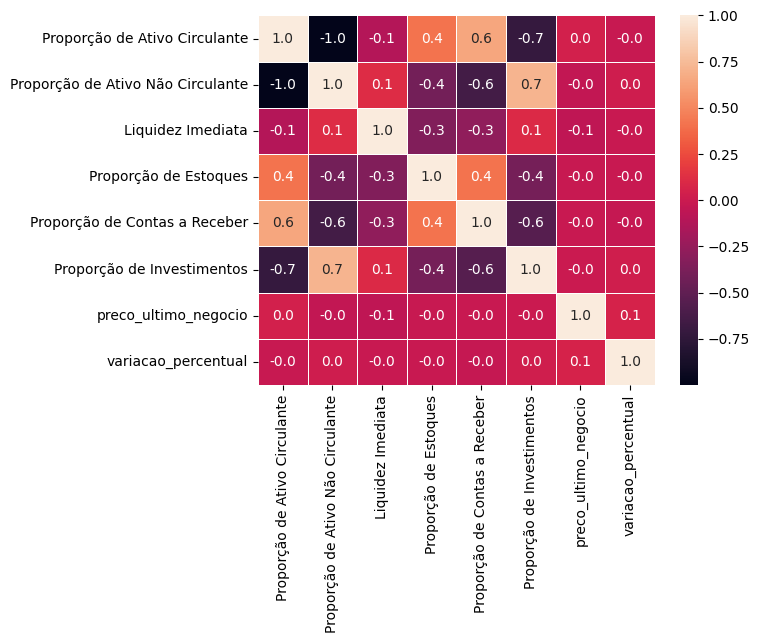

In [24]:
# plot da matriz de correlação

correlation = balance_cotacao_merge[['Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos',
        'preco_ultimo_negocio', 'variacao_percentual']].corr()

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [25]:
balance_cotacao_merge

,cod_negociacao,DENOM_CIA,CD_CVM,DT_FIM_EXERC,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual
0,GPIV33,INVESTCO S.A.,18589,2014-03-31,0.06,0.94,0.60,0.05,0.01,0.00,2014-03,3.47,NaN
1,GPIV33,INVESTCO S.A.,18589,2014-06-30,0.08,0.92,0.77,0.04,0.01,0.00,2014-06,4.91,0.41
2,GPIV33,INVESTCO S.A.,18589,2014-09-30,0.06,0.94,0.67,0.06,0.01,0.00,2014-09,4.79,-0.02
3,GPIV33,INVESTCO S.A.,18589,2015-03-31,0.10,0.90,0.81,0.00,0.01,0.00,2015-03,5.70,-0.02
4,GPIV33,INVESTCO S.A.,18589,2015-06-30,0.07,0.93,0.69,0.00,0.02,0.00,2015-06,6.95,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,DXCO3,DEXCO S.A.,21091,2022-06-30,0.31,0.69,0.32,0.31,0.11,0.41,2022-06,9.87,-0.12
2375,DXCO3,DEXCO S.A.,21091,2022-09-30,0.30,0.70,0.35,0.29,0.10,0.42,2022-09,9.35,-0.05
2376,DXCO3,DEXCO S.A.,21091,2023-03-31,0.25,0.75,0.32,0.33,0.08,0.47,2023-03,5.88,-0.13
2377,DXCO3,DEXCO S.A.,21091,2023-06-30,0.23,0.77,0.31,0.31,0.08,0.48,2023-06,8.35,-0.06


In [62]:
balance_cotacao_merge["variacao_percentual_0_1"] = [0 if x < 0 else 1 for x in balance_cotacao_merge["variacao_percentual"].values] 

<Axes: >

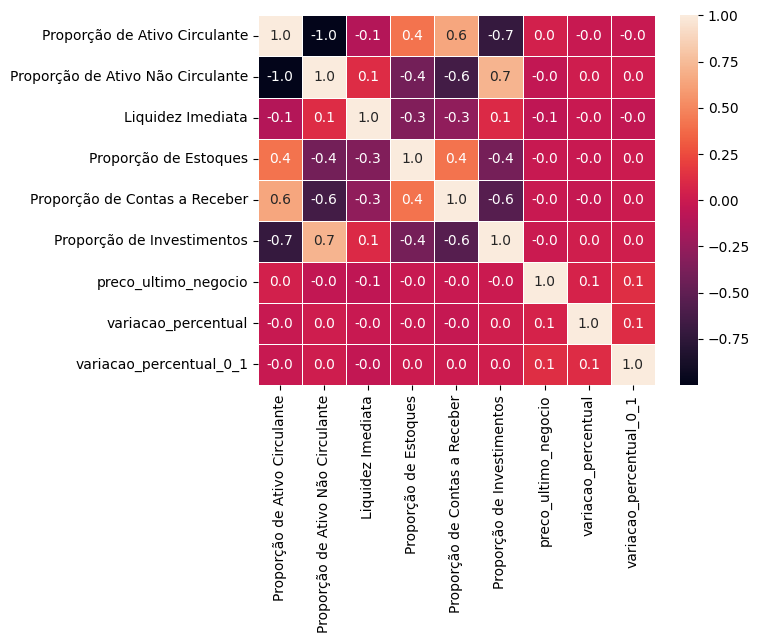

In [64]:
# plot da matriz de correlação

correlation = balance_cotacao_merge[['Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos',
        'preco_ultimo_negocio', 'variacao_percentual', 'variacao_percentual_0_1']].corr()

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [66]:
balance_cotacao_merge.isnull().sum()

cod_negociacao                        0
DENOM_CIA                             0
CD_CVM                                0
DT_FIM_EXERC                          0
Proporção de Ativo Circulante         0
Proporção de Ativo Não Circulante     0
Liquidez Imediata                     0
Proporção de Estoques                 0
Proporção de Contas a Receber         0
Proporção de Investimentos            0
data_pregao_mes_ano                   0
preco_ultimo_negocio                  0
variacao_percentual                  90
variacao_percentual_0_1               0
dtype: int64

In [26]:
balance_cotacao_merge.columns

Index(['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC',
       'Proporção de Ativo Circulante', 'Proporção de Ativo Não Circulante',
       'Liquidez Imediata', 'Proporção de Estoques',
       'Proporção de Contas a Receber', 'Proporção de Investimentos',
       'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual'],
      dtype='object')

In [27]:
dre_trim = pd.read_csv(r"C:\Users\usuario\Desktop\Programacao\financeml\src\data\dados_tratados\dre_tri.csv")

In [28]:
dre_trim

,Unnamed: 0,CNPJ_CIA,DENOM_CIA,CD_CVM,GRUPO_DFP,DT_FIM_EXERC,Corrente,Custo dos Bens e/ou Serviços Vendidos,Despesas Financeiras,Despesas Gerais e Administrativas,...,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,Margem Bruta,Margem Operacional,Margem Líquida,Cobertura de Juros,Turnover de Ativos
0,60,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Individual - Demonstração do Resultado,2014-03-31,-41937.00,-27198.00,-506268.00,-1580488.00,...,710363.00,372987.00,985903.00,0.00,1524978.00,0.96,0.89,1.34,-2.03,-17.59
1,61,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Individual - Demonstração do Resultado,2014-06-30,41937.00,-155592.00,-1412804.00,-5492590.00,...,2215433.00,1295191.00,776655.00,0.00,2716684.00,0.93,-0.24,0.33,-0.52,56.54
2,62,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Individual - Demonstração do Resultado,2014-09-30,0.00,-3048196.00,-1441332.00,-6405363.00,...,-116328.00,2255191.00,-4595661.00,0.00,-329161.00,-0.04,-2.34,-1.57,3.19,inf
3,63,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Individual - Demonstração do Resultado,2015-03-31,0.00,-693124.00,-644404.00,-886395.00,...,110457.00,1242593.00,1255247.00,0.00,971927.00,0.14,0.24,1.56,-2.23,inf
4,64,00.001.180/0001-26,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Individual - Demonstração do Resultado,2015-06-30,-84307.00,-2096638.00,-9523312.00,-3956953.00,...,336505.00,2114309.00,-1460973.00,0.00,277431.00,0.14,-1.37,-0.60,0.13,-28.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18419,19672,97.837.181/0001-47,DURATEX S.A.,21091,DF Individual - Demonstração do Resultado,2015-06-30,0.00,-1990642.00,-212038.00,-98038.00,...,605340.00,-157125.00,140429.00,0.00,119176.00,0.23,0.10,0.05,-0.43,inf
18420,19673,97.837.181/0001-47,DURATEX S.A.,21091,DF Individual - Demonstração do Resultado,2015-09-30,0.00,-2718385.00,-335064.00,-135513.00,...,857072.00,-187653.00,159853.00,0.00,141426.00,0.24,0.09,0.04,-0.39,inf
18421,19674,97.837.181/0001-47,DURATEX S.A.,21091,DF Individual - Demonstração do Resultado,2016-03-31,-2181.00,-643380.00,-73832.00,-34302.00,...,111422.00,-55973.00,-31122.00,0.00,31842.00,0.15,-0.01,-0.04,0.85,-346.08
18422,19675,97.837.181/0001-47,DURATEX S.A.,21091,DF Individual - Demonstração do Resultado,2016-06-30,-59005.00,-1936462.00,-226024.00,-92242.00,...,421868.00,-175063.00,-31356.00,0.00,114904.00,0.18,0.03,-0.01,0.46,-39.97


In [29]:
# Filtrar o dre_trim para incluir apenas a empresa 'INVESTCO S.A.'
dre_trim_investco = dre_trim[dre_trim['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print(dre_trim_investco.head())
pd.DataFrame(dre_trim_investco)

     Unnamed: 0            CNPJ_CIA      DENOM_CIA  CD_CVM  \
372         447  00.644.907/0001-93  INVESTCO S.A.   18589   
373         448  00.644.907/0001-93  INVESTCO S.A.   18589   
374         449  00.644.907/0001-93  INVESTCO S.A.   18589   
375         450  00.644.907/0001-93  INVESTCO S.A.   18589   
376         451  00.644.907/0001-93  INVESTCO S.A.   18589   

                                     GRUPO_DFP DT_FIM_EXERC  Corrente  \
372  DF Individual - Demonstração do Resultado   2014-03-31 -11280.00   
373  DF Individual - Demonstração do Resultado   2014-06-30 -34522.00   
374  DF Individual - Demonstração do Resultado   2014-09-30 -33169.00   
375  DF Individual - Demonstração do Resultado   2015-03-31 -12955.00   
376  DF Individual - Demonstração do Resultado   2015-06-30 -23297.00   

     Custo dos Bens e/ou Serviços Vendidos  Despesas Financeiras  \
372                              -12926.00             -12042.00   
373                              -36280.00          

,Unnamed: 0,CNPJ_CIA,DENOM_CIA,CD_CVM,GRUPO_DFP,DT_FIM_EXERC,Corrente,Custo dos Bens e/ou Serviços Vendidos,Despesas Financeiras,Despesas Gerais e Administrativas,...,Resultado Bruto,Resultado Financeiro,Resultado Líquido das Operações Continuadas,Resultado Líquido de Operações Descontinuadas,Resultado de Equivalência Patrimonial,Margem Bruta,Margem Operacional,Margem Líquida,Cobertura de Juros,Turnover de Ativos
372,447,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2014-03-31,-11280.00,-12926.00,-12042.00,-4618.00,...,38357.00,-11270.00,14771.00,0.00,0.00,0.75,0.66,0.29,-1.86,-4.55
373,448,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2014-06-30,-34522.00,-36280.00,-16716.00,-14018.00,...,117379.00,-12916.00,60103.00,0.00,0.00,0.76,0.67,0.39,-5.40,-4.45
374,449,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2014-09-30,-33169.00,-52341.00,-18625.00,-16678.00,...,152754.00,-12867.00,81481.00,0.00,0.00,0.74,0.66,0.40,-6.60,-6.18
375,450,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2015-03-31,-12955.00,-12549.00,-14493.00,-3646.00,...,40830.00,-12203.00,16423.00,0.00,0.00,0.76,0.69,0.31,-1.72,-4.12
376,451,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2015-06-30,-23297.00,-39629.00,-22979.00,-11194.00,...,120584.00,-17773.00,35627.00,0.00,0.00,0.75,0.53,0.22,-2.91,-6.88
377,452,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2015-09-30,-44936.00,-51345.00,-26894.00,-13840.00,...,165077.00,-18772.00,74927.00,0.00,0.00,0.76,0.64,0.35,-4.46,-4.82
378,453,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2016-03-31,-17782.00,-13359.00,-12417.00,-3554.00,...,56152.00,-10120.00,28485.00,0.00,0.00,0.81,0.75,0.41,-3.41,-3.91
379,454,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2016-06-30,-42916.00,-40403.00,-21947.00,-12378.00,...,168434.00,-15398.00,93221.00,0.00,0.00,0.81,0.75,0.45,-6.40,-4.87
380,455,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2016-09-30,-48621.00,-59537.00,-66176.00,-16892.00,...,219183.00,-56987.00,97119.00,0.00,0.00,0.79,0.73,0.35,-2.20,-5.73
381,456,00.644.907/0001-93,INVESTCO S.A.,18589,DF Individual - Demonstração do Resultado,2017-03-31,-8611.00,-15588.00,-18233.00,-3158.00,...,28652.00,-17041.00,5586.00,0.00,0.00,0.65,0.58,0.13,-0.46,-5.14


In [30]:
dre_trim.columns

Index(['Unnamed: 0', 'CNPJ_CIA', 'DENOM_CIA', 'CD_CVM', 'GRUPO_DFP',
       'DT_FIM_EXERC', 'Corrente', 'Custo dos Bens e/ou Serviços Vendidos',
       'Despesas Financeiras', 'Despesas Gerais e Administrativas',
       'Despesas/Receitas Operacionais', 'Diferido',
       'Imposto de Renda e Contribuição Social sobre o Lucro',
       'Lucro/Prejuízo Líquido das Operações Descontinuadas',
       'Lucro/Prejuízo do Período', 'Outras Despesas Operacionais',
       'Perdas pela Não Recuperabilidade de Ativos',
       'Receita de Venda de Bens e/ou Serviços', 'Receitas Financeiras',
       'Resultado Antes do Resultado Financeiro e dos Tributos',
       'Resultado Antes dos Tributos sobre o Lucro', 'Resultado Bruto',
       'Resultado Financeiro', 'Resultado Líquido das Operações Continuadas',
       'Resultado Líquido de Operações Descontinuadas',
       'Resultado de Equivalência Patrimonial', 'Margem Bruta',
       'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros',
       'Tur

In [31]:
# Etapa 1: Selecionar as colunas desejadas do dre_trim e remover duplicatas
columns_of_interest = [
    'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC', 'Margem Bruta', 
    'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 
    'Turnover de Ativos'
]
dre_trim_filtered = dre_trim[columns_of_interest].drop_duplicates().copy()

# Convertendo DT_FIM_EXERC para o mesmo formato de data_pregao_mes_ano
dre_trim_filtered['data_pregao_mes_ano'] = pd.to_datetime(dre_trim_filtered['DT_FIM_EXERC']).dt.to_period('M')

# Verificar os primeiros registros após filtrar e remover duplicatas
print("DRE Trim Filtered:")
print(dre_trim_filtered.head())

# Etapa 2: Filtrar balance_cotacao_merge para incluir apenas as colunas necessárias e remover duplicatas
additional_columns = ['CD_CVM', 'cod_negociacao', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual']
balance_cotacao_filtered = balance_cotacao_merge[additional_columns].drop_duplicates().copy()

# Verificar os primeiros registros após filtrar e remover duplicatas
print("\nBalance Cotacao Filtered:")
print(balance_cotacao_filtered.head())

# Etapa 3: Filtrar os DataFrames para garantir que apenas empresas presentes em ambos estejam incluídas
common_cd_cvm = set(dre_trim_filtered['CD_CVM']).intersection(set(balance_cotacao_filtered['CD_CVM']))

dre_trim_filtered = dre_trim_filtered[dre_trim_filtered['CD_CVM'].isin(common_cd_cvm)]
balance_cotacao_filtered = balance_cotacao_filtered[balance_cotacao_filtered['CD_CVM'].isin(common_cd_cvm)]

# Verificar os primeiros registros após filtrar
print("\nDRE Trim Filtered After Common Filter:")
print(dre_trim_filtered.head())

print("\nBalance Cotacao Filtered After Common Filter:")
print(balance_cotacao_filtered.head())

# Etapa 4: Realizar o merge com base em CD_CVM e data_pregao_mes_ano
dre_trim_resume = pd.merge(dre_trim_filtered, balance_cotacao_filtered, on=['CD_CVM', 'data_pregao_mes_ano'], how='left')

# Verificar os primeiros registros após o merge
print("\nDRE Trim Resume After Merge:")
print(dre_trim_resume.head())

# Reorganizar as colunas para colocar 'cod_negociacao' como a primeira coluna
columns_order = ['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual', 
                 'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos']
dre_trim_resume_e_cot = dre_trim_resume[columns_order]

# Verificar o resultado final para 'INVESTCO S.A.'
dre_trim_investco = dre_trim_resume_e_cot[dre_trim_resume_e_cot['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print("\nDRE Trim Investco After Merge:")
print(dre_trim_investco.head())

DRE Trim Filtered:
                              DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  \
0  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-03-31          0.96   
1  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-06-30          0.93   
2  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-09-30         -0.04   
3  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2015-03-31          0.14   
4  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2015-06-30          0.14   

   Margem Operacional  Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
0                0.89            1.34               -2.03              -17.59   
1               -0.24            0.33               -0.52               56.54   
2               -2.34           -1.57                3.19                 inf   
3                0.24            1.56               -2.23                 inf   
4               -1.37           -0.60                0.13              -28.86   

  data_pregao_mes_ano  
0

In [32]:
# Selecionar as colunas desejadas do dre_trim e remover duplicatas
columns_of_interest = [
    'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC', 'Margem Bruta', 
    'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 
    'Turnover de Ativos'
]
dre_trim_filtered = dre_trim[columns_of_interest].drop_duplicates().copy()

# Convertendo DT_FIM_EXERC para o mesmo formato de data_pregao_mes_ano
dre_trim_filtered['data_pregao_mes_ano'] = pd.to_datetime(dre_trim_filtered['DT_FIM_EXERC']).dt.to_period('M')

# Verificar os primeiros registros após filtrar e remover duplicatas
print("DRE Trim Filtered:")
print(dre_trim_filtered.head())

# Filtrar balance_cotacao_merge para incluir apenas as colunas necessárias e remover duplicatas
additional_columns = ['CD_CVM', 'cod_negociacao', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual']
balance_cotacao_filtered = balance_cotacao_merge[additional_columns].drop_duplicates().copy()

# Verificar os primeiros registros após filtrar e remover duplicatas
print("\nBalance Cotacao Filtered:")
print(balance_cotacao_filtered.head())

# Filtrar os DataFrames para garantir que apenas empresas presentes em ambos estejam incluídas
common_cd_cvm = set(dre_trim_filtered['CD_CVM']).intersection(set(balance_cotacao_filtered['CD_CVM']))

dre_trim_filtered = dre_trim_filtered[dre_trim_filtered['CD_CVM'].isin(common_cd_cvm)]
balance_cotacao_filtered = balance_cotacao_filtered[balance_cotacao_filtered['CD_CVM'].isin(common_cd_cvm)]

# Verificar os primeiros registros após filtrar
print("\nDRE Trim Filtered After Common Filter:")
print(dre_trim_filtered.head())

print("\nBalance Cotacao Filtered After Common Filter:")
print(balance_cotacao_filtered.head())

# Realizar o merge com base em CD_CVM e data_pregao_mes_ano
dre_trim_resume = pd.merge(dre_trim_filtered, balance_cotacao_filtered, on=['CD_CVM', 'data_pregao_mes_ano'], how='left')

# Verificar os primeiros registros após o merge
print("\nDRE Trim Resume After Merge:")
print(dre_trim_resume.head())

# Reorganizar as colunas para colocar 'cod_negociacao' como a primeira coluna
columns_order = ['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual', 
                 'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos']
dre_trim_resume_e_cot = dre_trim_resume[columns_order]

# Verificar o resultado final para 'INVESTCO S.A.'
dre_trim_investco = dre_trim_resume_e_cot[dre_trim_resume_e_cot['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print("\nDRE Trim Investco After Merge:")
print(dre_trim_investco.head())

DRE Trim Filtered:
                              DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  \
0  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-03-31          0.96   
1  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-06-30          0.93   
2  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-09-30         -0.04   
3  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2015-03-31          0.14   
4  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2015-06-30          0.14   

   Margem Operacional  Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
0                0.89            1.34               -2.03              -17.59   
1               -0.24            0.33               -0.52               56.54   
2               -2.34           -1.57                3.19                 inf   
3                0.24            1.56               -2.23                 inf   
4               -1.37           -0.60                0.13              -28.86   

  data_pregao_mes_ano  
0

In [33]:
# Selecionar as colunas desejadas do dre_trim e remover duplicatas
columns_of_interest = [
    'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC', 'Margem Bruta', 
    'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 
    'Turnover de Ativos'
]
dre_trim_filtered = dre_trim[columns_of_interest].drop_duplicates().copy()

# Convertendo DT_FIM_EXERC para o mesmo formato de data_pregao_mes_ano
dre_trim_filtered['data_pregao_mes_ano'] = pd.to_datetime(dre_trim_filtered['DT_FIM_EXERC']).dt.to_period('M')

# Verificar a unicidade das chaves em dre_trim_filtered
print("\nUnicidade em dre_trim_filtered antes do merge:")
print(dre_trim_filtered.duplicated(subset=['CD_CVM', 'data_pregao_mes_ano']).sum())

# Filtrar balance_cotacao_merge para incluir apenas as colunas necessárias e remover duplicatas
additional_columns = ['CD_CVM', 'cod_negociacao', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual']
balance_cotacao_filtered = balance_cotacao_merge[additional_columns].drop_duplicates().copy()

# Verificar a unicidade das chaves em balance_cotacao_filtered
print("\nUnicidade em balance_cotacao_filtered antes do merge:")
print(balance_cotacao_filtered.duplicated(subset=['CD_CVM', 'data_pregao_mes_ano']).sum())

# Filtrar os DataFrames para garantir que apenas empresas presentes em ambos estejam incluídas
common_cd_cvm = set(dre_trim_filtered['CD_CVM']).intersection(set(balance_cotacao_filtered['CD_CVM']))

dre_trim_filtered = dre_trim_filtered[dre_trim_filtered['CD_CVM'].isin(common_cd_cvm)]
balance_cotacao_filtered = balance_cotacao_filtered[balance_cotacao_filtered['CD_CVM'].isin(common_cd_cvm)]

# Verificar os primeiros registros após filtrar
print("\nDRE Trim Filtered After Common Filter:")
print(dre_trim_filtered.head())

print("\nBalance Cotacao Filtered After Common Filter:")
print(balance_cotacao_filtered.head())

# Realizar o merge com base em CD_CVM e data_pregao_mes_ano
dre_trim_resume = pd.merge(dre_trim_filtered, balance_cotacao_filtered, on=['CD_CVM', 'data_pregao_mes_ano'], how='left')

# Verificar os primeiros registros após o merge
print("\nDRE Trim Resume After Merge:")
print(dre_trim_resume.head())

# Reorganizar as colunas para colocar 'cod_negociacao' como a primeira coluna
columns_order = ['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual', 
                 'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos']
dre_trim_resume_e_cot = dre_trim_resume[columns_order]

# Verificar o resultado final para 'INVESTCO S.A.'
dre_trim_investco = dre_trim_resume_e_cot[dre_trim_resume_e_cot['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print("\nDRE Trim Investco After Merge:")
print(dre_trim_investco.head())


Unicidade em dre_trim_filtered antes do merge:
1

Unicidade em balance_cotacao_filtered antes do merge:
136

DRE Trim Filtered After Common Filter:
         DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  Margem Operacional  \
372  INVESTCO S.A.   18589   2014-03-31          0.75                0.66   
373  INVESTCO S.A.   18589   2014-06-30          0.76                0.67   
374  INVESTCO S.A.   18589   2014-09-30          0.74                0.66   
375  INVESTCO S.A.   18589   2015-03-31          0.76                0.69   
376  INVESTCO S.A.   18589   2015-06-30          0.75                0.53   

     Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
372            0.29               -1.86               -4.55   
373            0.39               -5.40               -4.45   
374            0.40               -6.60               -6.18   
375            0.31               -1.72               -4.12   
376            0.22               -2.91               -6.88   

    data_

In [34]:
# Selecionar as colunas desejadas do dre_trim e remover duplicatas
columns_of_interest = [
    'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC', 'Margem Bruta', 
    'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 
    'Turnover de Ativos'
]
dre_trim_filtered = dre_trim[columns_of_interest].drop_duplicates().copy()

# Convertendo DT_FIM_EXERC para o mesmo formato de data_pregao_mes_ano
dre_trim_filtered['data_pregao_mes_ano'] = pd.to_datetime(dre_trim_filtered['DT_FIM_EXERC']).dt.to_period('M')

# Remover duplicatas com base nas chaves 'CD_CVM' e 'data_pregao_mes_ano'
dre_trim_filtered = dre_trim_filtered.drop_duplicates(subset=['CD_CVM', 'data_pregao_mes_ano'])

# Verificar a unicidade das chaves em dre_trim_filtered
print("\nUnicidade em dre_trim_filtered após a remoção de duplicatas:")
print(dre_trim_filtered.duplicated(subset=['CD_CVM', 'data_pregao_mes_ano']).sum())

# Filtrar balance_cotacao_merge para incluir apenas as colunas necessárias e remover duplicatas
additional_columns = ['CD_CVM', 'cod_negociacao', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual']
balance_cotacao_filtered = balance_cotacao_merge[additional_columns].drop_duplicates().copy()

# Remover duplicatas com base nas chaves 'CD_CVM' e 'data_pregao_mes_ano'
balance_cotacao_filtered = balance_cotacao_filtered.drop_duplicates(subset=['CD_CVM', 'data_pregao_mes_ano'])

# Verificar a unicidade das chaves em balance_cotacao_filtered
print("\nUnicidade em balance_cotacao_filtered após a remoção de duplicatas:")
print(balance_cotacao_filtered.duplicated(subset=['CD_CVM', 'data_pregao_mes_ano']).sum())

# Filtrar os DataFrames para garantir que apenas empresas presentes em ambos estejam incluídas
common_cd_cvm = set(dre_trim_filtered['CD_CVM']).intersection(set(balance_cotacao_filtered['CD_CVM']))

dre_trim_filtered = dre_trim_filtered[dre_trim_filtered['CD_CVM'].isin(common_cd_cvm)]
balance_cotacao_filtered = balance_cotacao_filtered[balance_cotacao_filtered['CD_CVM'].isin(common_cd_cvm)]

# Verificar os primeiros registros após filtrar
print("\nDRE Trim Filtered After Common Filter:")
print(dre_trim_filtered.head())

print("\nBalance Cotacao Filtered After Common Filter:")
print(balance_cotacao_filtered.head())

# Realizar o merge com base em CD_CVM e data_pregao_mes_ano
dre_trim_resume = pd.merge(dre_trim_filtered, balance_cotacao_filtered, on=['CD_CVM', 'data_pregao_mes_ano'], how='left')

# Verificar os primeiros registros após o merge
print("\nDRE Trim Resume After Merge:")
print(dre_trim_resume.head())

# Reorganizar as colunas para colocar 'cod_negociacao' como a primeira coluna
columns_order = ['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual', 
                 'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos']
dre_trim_resume_e_cot = dre_trim_resume[columns_order]

# Verificar o resultado final para 'INVESTCO S.A.'
dre_trim_investco = dre_trim_resume_e_cot[dre_trim_resume_e_cot['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print("\nDRE Trim Investco After Merge:")
print(dre_trim_investco.head())


Unicidade em dre_trim_filtered após a remoção de duplicatas:
0

Unicidade em balance_cotacao_filtered após a remoção de duplicatas:
0

DRE Trim Filtered After Common Filter:
         DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  Margem Operacional  \
372  INVESTCO S.A.   18589   2014-03-31          0.75                0.66   
373  INVESTCO S.A.   18589   2014-06-30          0.76                0.67   
374  INVESTCO S.A.   18589   2014-09-30          0.74                0.66   
375  INVESTCO S.A.   18589   2015-03-31          0.76                0.69   
376  INVESTCO S.A.   18589   2015-06-30          0.75                0.53   

     Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
372            0.29               -1.86               -4.55   
373            0.39               -5.40               -4.45   
374            0.40               -6.60               -6.18   
375            0.31               -1.72               -4.12   
376            0.22               -2.91        


Unicidade em dre_trim_filtered após a remoção de duplicatas:
0

Unicidade em balance_cotacao_filtered após a remoção de duplicatas:
0

DRE Trim Filtered After Common Filter:
         DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  Margem Operacional  \
372  INVESTCO S.A.   18589   2014-03-31          0.75                0.66   
373  INVESTCO S.A.   18589   2014-06-30          0.76                0.67   
374  INVESTCO S.A.   18589   2014-09-30          0.74                0.66   
375  INVESTCO S.A.   18589   2015-03-31          0.76                0.69   
376  INVESTCO S.A.   18589   2015-06-30          0.75                0.53   

     Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
372            0.29               -1.86               -4.55   
373            0.39               -5.40               -4.45   
374            0.40               -6.60               -6.18   
375            0.31               -1.72               -4.12   
376            0.22               -2.91        

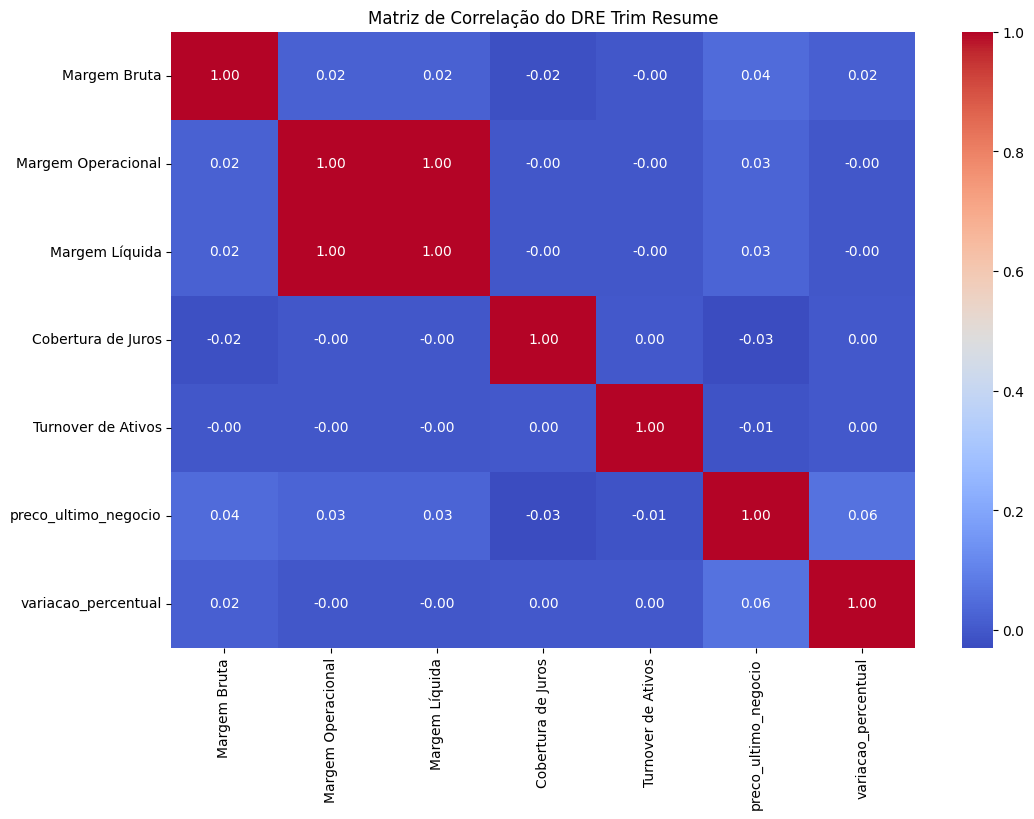

In [35]:
# Selecionar as colunas desejadas do dre_trim e remover duplicatas
columns_of_interest = [
    'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC', 'Margem Bruta', 
    'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 
    'Turnover de Ativos'
]
dre_trim_filtered = dre_trim[columns_of_interest].drop_duplicates().copy()

# Convertendo DT_FIM_EXERC para o mesmo formato de data_pregao_mes_ano
dre_trim_filtered['data_pregao_mes_ano'] = pd.to_datetime(dre_trim_filtered['DT_FIM_EXERC']).dt.to_period('M')

# Remover duplicatas com base nas chaves 'CD_CVM' e 'data_pregao_mes_ano'
dre_trim_filtered = dre_trim_filtered.drop_duplicates(subset=['CD_CVM', 'data_pregao_mes_ano'])

# Verificar a unicidade das chaves em dre_trim_filtered
print("\nUnicidade em dre_trim_filtered após a remoção de duplicatas:")
print(dre_trim_filtered.duplicated(subset=['CD_CVM', 'data_pregao_mes_ano']).sum())

# Filtrar balance_cotacao_merge para incluir apenas as colunas necessárias e remover duplicatas
additional_columns = ['CD_CVM', 'cod_negociacao', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual']
balance_cotacao_filtered = balance_cotacao_merge[additional_columns].drop_duplicates().copy()

# Remover duplicatas com base nas chaves 'CD_CVM' e 'data_pregao_mes_ano'
balance_cotacao_filtered = balance_cotacao_filtered.drop_duplicates(subset=['CD_CVM', 'data_pregao_mes_ano'])

# Verificar a unicidade das chaves em balance_cotacao_filtered
print("\nUnicidade em balance_cotacao_filtered após a remoção de duplicatas:")
print(balance_cotacao_filtered.duplicated(subset=['CD_CVM', 'data_pregao_mes_ano']).sum())

# Filtrar os DataFrames para garantir que apenas empresas presentes em ambos estejam incluídas
common_cd_cvm = set(dre_trim_filtered['CD_CVM']).intersection(set(balance_cotacao_filtered['CD_CVM']))

dre_trim_filtered = dre_trim_filtered[dre_trim_filtered['CD_CVM'].isin(common_cd_cvm)]
balance_cotacao_filtered = balance_cotacao_filtered[balance_cotacao_filtered['CD_CVM'].isin(common_cd_cvm)]

# Verificar os primeiros registros após filtrar
print("\nDRE Trim Filtered After Common Filter:")
print(dre_trim_filtered.head())

print("\nBalance Cotacao Filtered After Common Filter:")
print(balance_cotacao_filtered.head())

# Realizar o merge com base em CD_CVM e data_pregao_mes_ano
dre_trim_resume = pd.merge(dre_trim_filtered, balance_cotacao_filtered, on=['CD_CVM', 'data_pregao_mes_ano'], how='left')

# Verificar os primeiros registros após o merge
print("\nDRE Trim Resume After Merge:")
print(dre_trim_resume.head())

# Reorganizar as colunas para colocar 'cod_negociacao' como a primeira coluna
columns_order = ['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual', 
                 'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos']
dre_trim_resume_e_cot = dre_trim_resume[columns_order]

# Verificar o resultado final para 'INVESTCO S.A.'
dre_trim_investco = dre_trim_resume_e_cot[dre_trim_resume_e_cot['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print("\nDRE Trim Investco After Merge:")
print(dre_trim_investco.head())

# Plot da matriz de correlação
correlation = dre_trim_resume_e_cot[['Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos', 
                                     'preco_ultimo_negocio', 'variacao_percentual']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação do DRE Trim Resume')
plt.show()

In [36]:
# Verificar as primeiras linhas do DataFrame final
print("\nDRE Trim Resume Final:")
print(dre_trim_resume_e_cot.head())

# Verificar a unicidade das chaves em dre_trim_resume_e_cot
print("\nUnicidade em dre_trim_resume_e_cot após a remoção de duplicatas:")
print(dre_trim_resume_e_cot.duplicated(subset=['cod_negociacao', 'data_pregao_mes_ano']).sum())


DRE Trim Resume Final:
  cod_negociacao      DENOM_CIA  CD_CVM data_pregao_mes_ano  \
0         GPIV33  INVESTCO S.A.   18589             2014-03   
1         GPIV33  INVESTCO S.A.   18589             2014-06   
2         GPIV33  INVESTCO S.A.   18589             2014-09   
3         GPIV33  INVESTCO S.A.   18589             2015-03   
4         GPIV33  INVESTCO S.A.   18589             2015-06   

   preco_ultimo_negocio  variacao_percentual  Margem Bruta  \
0                  3.47                  NaN          0.75   
1                  4.91                 0.41          0.76   
2                  4.79                -0.02          0.74   
3                  5.70                -0.02          0.76   
4                  6.95                 0.22          0.75   

   Margem Operacional  Margem Líquida  Cobertura de Juros  Turnover de Ativos  
0                0.66            0.29               -1.86               -4.55  
1                0.67            0.39               -5.40       

In [49]:
dre_trim_resume_e_cot.sort_values(by = "variacao_percentual", ascending=False)

,cod_negociacao,DENOM_CIA,CD_CVM,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual,Margem Bruta,Margem Operacional,Margem Líquida,Cobertura de Juros,Turnover de Ativos
860,ENEV3,ENEVA S.A,21237,2016-06,11.60,81.86,NaN,-inf,-inf,2.17,NaN
1007,BRPR3,BR PROPERTIES S.A.,19925,2023-03,234.38,34.89,1.00,-4.15,-1.69,44.58,-0.26
1107,TCSA3,TECNISA S.A.,20435,2020-06,12.61,15.81,NaN,-inf,-inf,4.33,NaN
104,GFSA3,GAFISA S.A.,16101,2017-03,27.25,13.65,-0.02,-1.16,-1.51,3.65,inf
1628,CASH3,MÉLIUZ S.A.,25232,2023-06,7.81,7.78,-0.17,-0.20,-0.05,0.70,inf
...,...,...,...,...,...,...,...,...,...,...,...
3531,NaN,DURATEX S.A.,21091,2015-06,NaN,NaN,0.23,0.10,0.05,-0.43,inf
3532,NaN,DURATEX S.A.,21091,2015-09,NaN,NaN,0.24,0.09,0.04,-0.39,inf
3533,NaN,DURATEX S.A.,21091,2016-03,NaN,NaN,0.15,-0.01,-0.04,0.85,-346.08
3534,NaN,DURATEX S.A.,21091,2016-06,NaN,NaN,0.18,0.03,-0.01,0.46,-39.97


In [51]:
dre_trim_resume_e_cot["variacao_percentual_0_1"] = [0 if x < 0 else 1 for x in dre_trim_resume_e_cot["variacao_percentual"].values] 

In [52]:
dre_trim_resume_e_cot

,cod_negociacao,DENOM_CIA,CD_CVM,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual,Margem Bruta,Margem Operacional,Margem Líquida,Cobertura de Juros,Turnover de Ativos,variacao_percentual_0_1
0,GPIV33,INVESTCO S.A.,18589,2014-03,3.47,NaN,0.75,0.66,0.29,-1.86,-4.55,1
1,GPIV33,INVESTCO S.A.,18589,2014-06,4.91,0.41,0.76,0.67,0.39,-5.40,-4.45,1
2,GPIV33,INVESTCO S.A.,18589,2014-09,4.79,-0.02,0.74,0.66,0.40,-6.60,-6.18,0
3,GPIV33,INVESTCO S.A.,18589,2015-03,5.70,-0.02,0.76,0.69,0.31,-1.72,-4.12,0
4,GPIV33,INVESTCO S.A.,18589,2015-06,6.95,0.22,0.75,0.53,0.22,-2.91,-6.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3531,NaN,DURATEX S.A.,21091,2015-06,NaN,NaN,0.23,0.10,0.05,-0.43,inf,1
3532,NaN,DURATEX S.A.,21091,2015-09,NaN,NaN,0.24,0.09,0.04,-0.39,inf,1
3533,NaN,DURATEX S.A.,21091,2016-03,NaN,NaN,0.15,-0.01,-0.04,0.85,-346.08,1
3534,NaN,DURATEX S.A.,21091,2016-06,NaN,NaN,0.18,0.03,-0.01,0.46,-39.97,1


In [56]:
dre_trim_resume_e_cot.isnull().sum()

cod_negociacao             1159
DENOM_CIA                     0
CD_CVM                        0
data_pregao_mes_ano           0
preco_ultimo_negocio       1159
variacao_percentual        1249
Margem Bruta                992
Margem Operacional           10
Margem Líquida                9
Cobertura de Juros          113
Turnover de Ativos          685
variacao_percentual_0_1       0
dtype: int64

In [60]:
df_test_dre = dre_trim_resume_e_cot.dropna(subset=['variacao_percentual'])

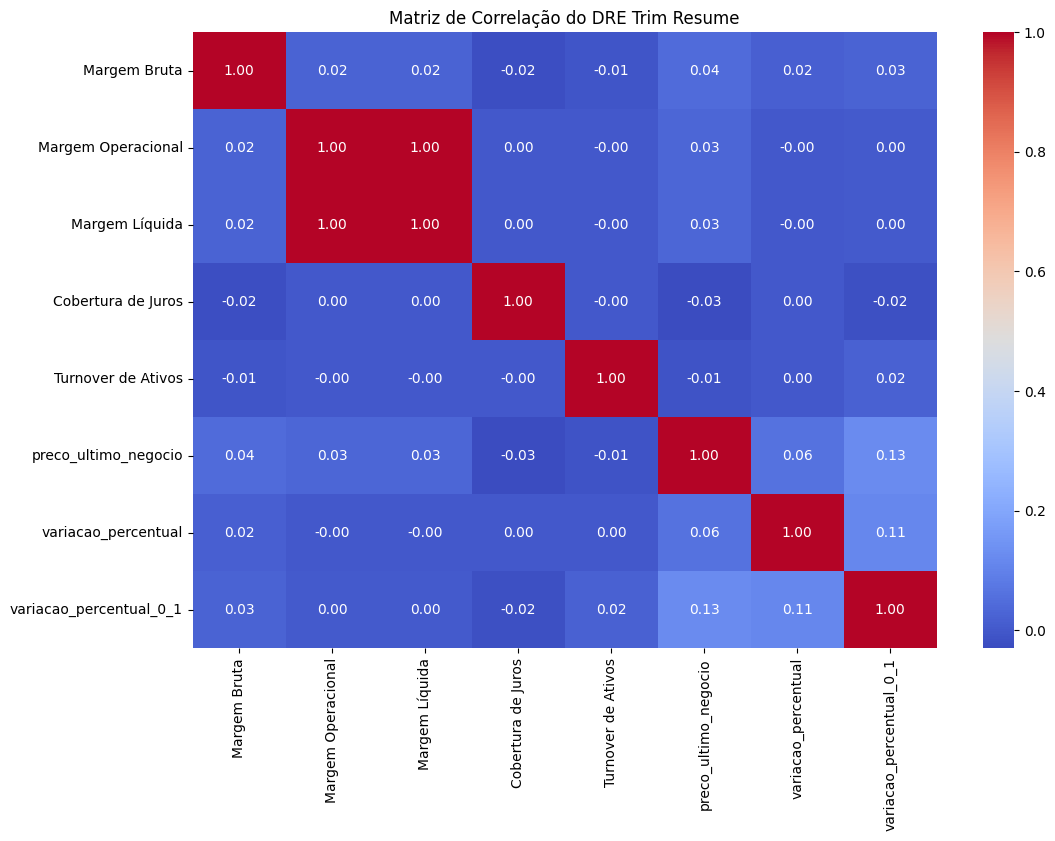

In [61]:
# Plot da matriz de correlação
correlation = df_test_dre[['Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos', 
                                     'preco_ultimo_negocio', 'variacao_percentual', "variacao_percentual_0_1"]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação do DRE Trim Resume')
plt.show()

In [38]:
# Selecionar as colunas desejadas do dre_trim e remover duplicatas
columns_of_interest = [
    'DENOM_CIA', 'CD_CVM', 'DT_FIM_EXERC', 'Margem Bruta', 
    'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 
    'Turnover de Ativos'
]
dre_trim_filtered = dre_trim[columns_of_interest].drop_duplicates().copy()

# Convertendo DT_FIM_EXERC para o mesmo formato de data_pregao_mes_ano
dre_trim_filtered['data_pregao_mes_ano'] = pd.to_datetime(dre_trim_filtered['DT_FIM_EXERC']).dt.to_period('M')

# Verificar os primeiros registros após filtrar e remover duplicatas
print("DRE Trim Filtered:")
print(dre_trim_filtered.head())

DRE Trim Filtered:
                              DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  \
0  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-03-31          0.96   
1  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-06-30          0.93   
2  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2014-09-30         -0.04   
3  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2015-03-31          0.14   
4  CENTRAIS ELET BRAS S.A. - ELETROBRAS    2437   2015-06-30          0.14   

   Margem Operacional  Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
0                0.89            1.34               -2.03              -17.59   
1               -0.24            0.33               -0.52               56.54   
2               -2.34           -1.57                3.19                 inf   
3                0.24            1.56               -2.23                 inf   
4               -1.37           -0.60                0.13              -28.86   

  data_pregao_mes_ano  
0

In [39]:
# Filtrar balance_cotacao_merge para incluir apenas as colunas necessárias e remover duplicatas
additional_columns = ['CD_CVM', 'cod_negociacao', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual']
balance_cotacao_filtered = balance_cotacao_merge[additional_columns].drop_duplicates().copy()

# Verificar os primeiros registros após filtrar e remover duplicatas
print("\nBalance Cotacao Filtered:")
print(balance_cotacao_filtered.head())


Balance Cotacao Filtered:
   CD_CVM cod_negociacao data_pregao_mes_ano  preco_ultimo_negocio  \
0   18589         GPIV33             2014-03                  3.47   
1   18589         GPIV33             2014-06                  4.91   
2   18589         GPIV33             2014-09                  4.79   
3   18589         GPIV33             2015-03                  5.70   
4   18589         GPIV33             2015-06                  6.95   

   variacao_percentual  
0                  NaN  
1                 0.41  
2                -0.02  
3                -0.02  
4                 0.22  


In [40]:
# Filtrar os DataFrames para garantir que apenas empresas presentes em ambos estejam incluídas
common_cd_cvm = set(dre_trim_filtered['CD_CVM']).intersection(set(balance_cotacao_filtered['CD_CVM']))

dre_trim_filtered = dre_trim_filtered[dre_trim_filtered['CD_CVM'].isin(common_cd_cvm)]
balance_cotacao_filtered = balance_cotacao_filtered[balance_cotacao_filtered['CD_CVM'].isin(common_cd_cvm)]

# Verificar os primeiros registros após filtrar
print("\nDRE Trim Filtered After Common Filter:")
print(dre_trim_filtered.head())

print("\nBalance Cotacao Filtered After Common Filter:")
print(balance_cotacao_filtered.head())


DRE Trim Filtered After Common Filter:
         DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  Margem Operacional  \
372  INVESTCO S.A.   18589   2014-03-31          0.75                0.66   
373  INVESTCO S.A.   18589   2014-06-30          0.76                0.67   
374  INVESTCO S.A.   18589   2014-09-30          0.74                0.66   
375  INVESTCO S.A.   18589   2015-03-31          0.76                0.69   
376  INVESTCO S.A.   18589   2015-06-30          0.75                0.53   

     Margem Líquida  Cobertura de Juros  Turnover de Ativos  \
372            0.29               -1.86               -4.55   
373            0.39               -5.40               -4.45   
374            0.40               -6.60               -6.18   
375            0.31               -1.72               -4.12   
376            0.22               -2.91               -6.88   

    data_pregao_mes_ano  
372             2014-03  
373             2014-06  
374             2014-09  
375           

In [41]:
# Realizar o merge com base em CD_CVM e data_pregao_mes_ano
dre_trim_resume = pd.merge(dre_trim_filtered, balance_cotacao_filtered, on=['CD_CVM', 'data_pregao_mes_ano'], how='left')

# Verificar os primeiros registros após o merge
print("\nDRE Trim Resume After Merge:")
print(dre_trim_resume.head())


DRE Trim Resume After Merge:
       DENOM_CIA  CD_CVM DT_FIM_EXERC  Margem Bruta  Margem Operacional  \
0  INVESTCO S.A.   18589   2014-03-31          0.75                0.66   
1  INVESTCO S.A.   18589   2014-06-30          0.76                0.67   
2  INVESTCO S.A.   18589   2014-09-30          0.74                0.66   
3  INVESTCO S.A.   18589   2015-03-31          0.76                0.69   
4  INVESTCO S.A.   18589   2015-06-30          0.75                0.53   

   Margem Líquida  Cobertura de Juros  Turnover de Ativos data_pregao_mes_ano  \
0            0.29               -1.86               -4.55             2014-03   
1            0.39               -5.40               -4.45             2014-06   
2            0.40               -6.60               -6.18             2014-09   
3            0.31               -1.72               -4.12             2015-03   
4            0.22               -2.91               -6.88             2015-06   

  cod_negociacao  preco_ultimo_n

In [42]:
# Reorganizar as colunas para colocar 'cod_negociacao' como a primeira coluna
columns_order = ['cod_negociacao', 'DENOM_CIA', 'CD_CVM', 'data_pregao_mes_ano', 'preco_ultimo_negocio', 'variacao_percentual', 
                 'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 'Cobertura de Juros', 'Turnover de Ativos']
dre_trim_resume_e_cot = dre_trim_resume[columns_order]

# Verificar o resultado final para 'INVESTCO S.A.'
dre_trim_investco = dre_trim_resume_e_cot[dre_trim_resume_e_cot['DENOM_CIA'] == 'INVESTCO S.A.']

# Exibir as primeiras linhas do DataFrame filtrado
print("\nDRE Trim Investco After Merge:")
print(dre_trim_investco.head())


DRE Trim Investco After Merge:
  cod_negociacao      DENOM_CIA  CD_CVM data_pregao_mes_ano  \
0         GPIV33  INVESTCO S.A.   18589             2014-03   
1         GPIV33  INVESTCO S.A.   18589             2014-06   
2         GPIV33  INVESTCO S.A.   18589             2014-09   
3         GPIV33  INVESTCO S.A.   18589             2015-03   
4         GPIV33  INVESTCO S.A.   18589             2015-06   

   preco_ultimo_negocio  variacao_percentual  Margem Bruta  \
0                  3.47                  NaN          0.75   
1                  4.91                 0.41          0.76   
2                  4.79                -0.02          0.74   
3                  5.70                -0.02          0.76   
4                  6.95                 0.22          0.75   

   Margem Operacional  Margem Líquida  Cobertura de Juros  Turnover de Ativos  
0                0.66            0.29               -1.86               -4.55  
1                0.67            0.39               -5.4

In [43]:
pd.DataFrame(dre_trim_resume_e_cot)

,cod_negociacao,DENOM_CIA,CD_CVM,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual,Margem Bruta,Margem Operacional,Margem Líquida,Cobertura de Juros,Turnover de Ativos
0,GPIV33,INVESTCO S.A.,18589,2014-03,3.47,NaN,0.75,0.66,0.29,-1.86,-4.55
1,GPIV33,INVESTCO S.A.,18589,2014-06,4.91,0.41,0.76,0.67,0.39,-5.40,-4.45
2,GPIV33,INVESTCO S.A.,18589,2014-09,4.79,-0.02,0.74,0.66,0.40,-6.60,-6.18
3,GPIV33,INVESTCO S.A.,18589,2015-03,5.70,-0.02,0.76,0.69,0.31,-1.72,-4.12
4,GPIV33,INVESTCO S.A.,18589,2015-06,6.95,0.22,0.75,0.53,0.22,-2.91,-6.88
...,...,...,...,...,...,...,...,...,...,...,...
3531,NaN,DURATEX S.A.,21091,2015-06,NaN,NaN,0.23,0.10,0.05,-0.43,inf
3532,NaN,DURATEX S.A.,21091,2015-09,NaN,NaN,0.24,0.09,0.04,-0.39,inf
3533,NaN,DURATEX S.A.,21091,2016-03,NaN,NaN,0.15,-0.01,-0.04,0.85,-346.08
3534,NaN,DURATEX S.A.,21091,2016-06,NaN,NaN,0.18,0.03,-0.01,0.46,-39.97


In [44]:

pd.DataFrame(dre_trim_investco)


,cod_negociacao,DENOM_CIA,CD_CVM,data_pregao_mes_ano,preco_ultimo_negocio,variacao_percentual,Margem Bruta,Margem Operacional,Margem Líquida,Cobertura de Juros,Turnover de Ativos
0,GPIV33,INVESTCO S.A.,18589,2014-03,3.47,NaN,0.75,0.66,0.29,-1.86,-4.55
1,GPIV33,INVESTCO S.A.,18589,2014-06,4.91,0.41,0.76,0.67,0.39,-5.40,-4.45
2,GPIV33,INVESTCO S.A.,18589,2014-09,4.79,-0.02,0.74,0.66,0.40,-6.60,-6.18
3,GPIV33,INVESTCO S.A.,18589,2015-03,5.70,-0.02,0.76,0.69,0.31,-1.72,-4.12
4,GPIV33,INVESTCO S.A.,18589,2015-06,6.95,0.22,0.75,0.53,0.22,-2.91,-6.88
5,GPIV33,INVESTCO S.A.,18589,2015-09,6.50,-0.06,0.76,0.64,0.35,-4.46,-4.82
6,GPIV33,INVESTCO S.A.,18589,2016-03,7.70,0.00,0.81,0.75,0.41,-3.41,-3.91
7,GPIV33,INVESTCO S.A.,18589,2016-03,7.25,-0.06,0.81,0.75,0.41,-3.41,-3.91
8,GPIV33,INVESTCO S.A.,18589,2016-06,7.49,0.03,0.81,0.75,0.45,-6.40,-4.87
9,GPIV33,INVESTCO S.A.,18589,2016-09,6.85,-0.09,0.79,0.73,0.35,-2.20,-5.73


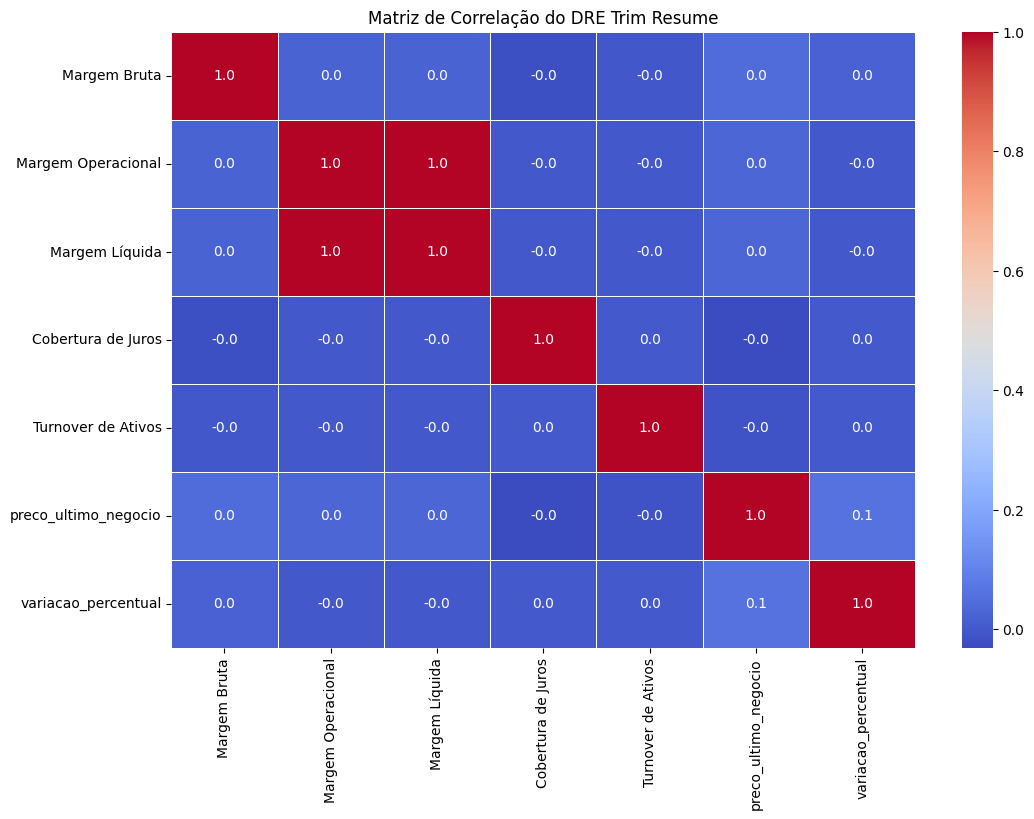

In [45]:
# Selecionar as colunas relevantes para a correlação no dre_trim_resume
correlation_columns = [
    'Margem Bruta', 'Margem Operacional', 'Margem Líquida', 
    'Cobertura de Juros', 'Turnover de Ativos', 
    'preco_ultimo_negocio', 'variacao_percentual'
]

# Calcular a matriz de correlação
correlation_matrix = dre_trim_resume[correlation_columns].corr()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o heatmap da matriz de correlação
plot = sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidths=.6, cmap='coolwarm')

# Definir o título do gráfico
plt.title('Matriz de Correlação do DRE Trim Resume')

# Exibir o gráfico
plt.show()

In [46]:
#PRA BAIXO ESTÀ RUIM

# Ordenar os dados por código de negociação e data do pregão
cotacao_trim_filtered = cotacao_trim_filtered.sort_values(by=['cod_negociacao', 'data_pregao'])


# Função para encontrar a data mais próxima
def find_nearest_date(pregao_date, exerc_dates):
    idx = (np.abs(exerc_dates - pregao_date)).argmin()
    return exerc_dates.iloc[idx]

# Aplicar a função para encontrar a data mais próxima
nearest_dates = []
for idx, row in balance_trim_filtered.iterrows():
    pregao_dates = cotacao_trim_filtered[cotacao_trim_filtered['cod_negociacao'] == row['cod_negociacao']]['data_pregao']
    if not pregao_dates.empty:
        nearest_date = find_nearest_date(row['DT_FIM_EXERC'], pregao_dates)
    else:
        nearest_date = pd.NaT
    nearest_dates.append(nearest_date)

balance_trim_filtered['nearest_date'] = nearest_dates

# Selecionar as colunas desejadas do balance_trim
cols_to_add = [
    'Proporção de Ativo Circulante', 
    'Proporção de Ativo Não Circulante', 
    'Liquidez Imediata', 
    'Proporção de Estoques', 
    'Proporção de Contas a Receber', 
    'Proporção de Investimentos'
]

# Mesclar os DataFrames com base em 'cod_negociacao' e a data mais próxima
cotacao_trim_merged = pd.merge(cotacao_trim_filtered, balance_trim_filtered[['cod_negociacao', 'nearest_date'] + cols_to_add],
                               left_on=['cod_negociacao', 'data_pregao'], right_on=['cod_negociacao', 'nearest_date'], how='left')

# Reordenar as colunas para que as novas colunas estejam após 'variacao_percentual'
cols = cotacao_trim_merged.columns.tolist()
insert_pos = cols.index('variacao_percentual') + 1
for col in cols_to_add:
    cols.insert(insert_pos, cols.pop(cols.index(col)))
    insert_pos += 1
cotacao_trim_merged = cotacao_trim_merged[cols]

# Remover a coluna 'nearest_date' após a mesclagem
cotacao_trim_merged = cotacao_trim_merged.drop(columns=['nearest_date'])

# Mostrar o DataFrame mesclado
print(cotacao_trim_merged)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
pd.DataFrame(cotacao_trim_merged)

,data_pregao,CNPJ,cod_negociacao,noma_empresa,preco_ultimo_negocio,variacao_percentual,Proporção de Ativo Circulante,Proporção de Ativo Não Circulante,Liquidez Imediata,Proporção de Estoques,Proporção de Contas a Receber,Proporção de Investimentos,noma_empresa_padronizado
0,2014-03-31,7526557000100.00,ABEV3,AMBEV S/A,1970-01-01 00:00:00.000000016,0.00,0.13,0.87,0.32,0.19,0.02,0.70,ambevsa
1,2014-06-30,7526557000100.00,ABEV3,AMBEV S/A,1970-01-01 00:00:00.000000015,-7.02,0.12,0.88,0.27,0.20,0.03,0.71,ambevsa
2,2014-09-30,7526557000100.00,ABEV3,AMBEV S/A,1970-01-01 00:00:00.000000016,1.78,0.12,0.88,0.30,0.20,0.02,0.71,ambevsa
3,2014-12-30,7526557000100.00,ABEV3,AMBEV S/A,1970-01-01 00:00:00.000000016,1.93,NaN,NaN,NaN,NaN,NaN,NaN,ambevsa
4,2015-03-31,7526557000100.00,ABEV3,AMBEV S/A,1970-01-01 00:00:00.000000018,12.84,0.14,0.86,0.42,0.16,0.02,0.70,ambevsa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,2023-06-30,13574594000196.00,ZAMP3,ZAMP S.A.,1970-01-01 00:00:00.000000004,19.42,0.22,0.78,0.02,0.19,0.04,0.00,zamp
6579,2023-08-31,13574594000196.00,ZAMP3,ZAMP S.A.,1970-01-01 00:00:00.000000005,21.98,NaN,NaN,NaN,NaN,NaN,NaN,zamp
6580,2023-09-29,13574594000196.00,ZAMP3,ZAMP S.A.,1970-01-01 00:00:00.000000006,10.45,0.21,0.79,0.02,0.18,0.05,0.00,zamp
6581,2023-11-30,13574594000196.00,ZAMP3,ZAMP S.A.,1970-01-01 00:00:00.000000005,-5.06,NaN,NaN,NaN,NaN,NaN,NaN,zamp


In [ ]:
num_empresas_unicas = cotacao_trim_merged['cod_negociacao'].nunique()
print(f"Empresas únicas no DataFrame mesclado: {num_empresas_unicas}")

Empresas únicas no DataFrame mesclado: 142


In [ ]:
cotacao_abev3 = cotacao_trim_merged[cotacao_trim_merged['cod_negociacao'] == 'ABEV3']
print(cotacao_abev3)

   data_pregao             CNPJ cod_negociacao noma_empresa  \
0   2014-03-31 7526557000100.00          ABEV3    AMBEV S/A   
1   2014-06-30 7526557000100.00          ABEV3    AMBEV S/A   
2   2014-09-30 7526557000100.00          ABEV3    AMBEV S/A   
3   2014-12-30 7526557000100.00          ABEV3    AMBEV S/A   
4   2015-03-31 7526557000100.00          ABEV3    AMBEV S/A   
..         ...              ...            ...          ...   
57  2023-06-30 7526557000100.00          ABEV3    AMBEV S/A   
58  2023-08-31 7526557000100.00          ABEV3    AMBEV S/A   
59  2023-09-29 7526557000100.00          ABEV3    AMBEV S/A   
60  2023-11-30 7526557000100.00          ABEV3    AMBEV S/A   
61  2024-01-02 7526557000100.00          ABEV3    AMBEV S/A   

            preco_ultimo_negocio  variacao_percentual  \
0  1970-01-01 00:00:00.000000016                 0.00   
1  1970-01-01 00:00:00.000000015                -7.02   
2  1970-01-01 00:00:00.000000016                 1.78   
3  1970-01-01 0